<a href="https://colab.research.google.com/github/aritraghsh09/GaMorNet/blob/master/tutorials/gamornet_predict_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Stuff

Although this tutorial can be run on any machine which has GaMorNet installed, it's pretty handy to run this on Google Colab as you can easily use Colab's GPUs for this tutorial.

Note that with the free version of Colab, you will only have access to a limited amount of memory. Thus, the number of images we use here for training/testing is very small. In reality, GaMorNet can handle hundreds of thousands of images. 

This first section is meant to be run only when following this tutorial in Google Colab.


### Make things Fast!

Before we dive in, let's make sure we're using a GPU for this tutorial.  

To do this, select "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU".

The following snippet will verify that we have access to a GPU.

In [1]:
import os
# Suppressing TF warnings and info for a cleaner environ
# Set this to 0,1 for info and warnings respectively.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
 
# Magic telling Colab we want TF version ~=1.0
%tensorflow_version 1.x

#Checking access to GPU
import tensorflow as tf
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

TensorFlow 1.x selected.
SUCCESS: Found GPU: /device:GPU:0


### Install GaMorNet

In [2]:
!pip install -q --upgrade gamornet

     |████████████████████████████████| 411.0MB 41kB/s 


In [14]:
##Checking which version of Tensorflow & GaMorNet is being used and whether the installation worked.
import tensorflow as tf
import gamornet
print(tf.__version__)
print(gamornet.__version__)
from gamornet.keras_module import gamornet_train_keras, gamornet_tl_keras, gamornet_predict_keras
from gamornet.tflearn_module import gamornet_train_tflearn, gamornet_tl_tflearn, gamornet_predict_tflearn

1.15.2
0.4.1


# Reference

All mentions of "the paper" in this tutorial, refer to [Ghosh et. al. (2020)](https://iopscience.iop.org/article/10.3847/1538-4357/ab8a47)

# Installing Libraries Needed for this Tutorial

In [4]:
!pip install matplotlib

# Predicting with GaMorNet

One of the most common tasks that you can use GaMorNet for is to perform predictions on images. 

The models that you would want to use to make these predictions will depend on the dataset that you have. For advice regarding this please refer to our [PDR Handbook.](https://gamornet.readthedocs.io/en/latest/usage_guide.html) 

For the purposes of this demonstration, we are going to use the models trained on SDSS simulations and real data in the paper. We are going to perform the prediction on two SDSS g-band images from our testing dataset. 

# Downloading & Visalizing the Data

First, let's download the images that we are going to use to perform the predictive analysis. We will download these into the local filesystem from Yale Astronomy's FTP service, where these are hosted 


*Tip: The `%%bash` command lets Colab know that all the commands in this shell needs to be passed the local unix virtual environment.*

In [5]:
%%bash
#get zip file from server
wget ftp://ftp.astro.yale.edu/pub/aghosh/gamornet_tutorial_files/predict_images/predict_images.tar.gz

#create new directory and unzip to it
mkdir predict_images
tar -xvf predict_images.tar.gz -C ./predict_images/ 

./587722984439545906-g.fits
./587725552281976904-g.fits


--2020-06-14 23:49:18--  ftp://ftp.astro.yale.edu/pub/aghosh/gamornet_tutorial_files/predict_images/predict_images.tar.gz
           => ‘predict_images.tar.gz’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.astro.yale.edu (ftp.astro.yale.edu)|128.36.139.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/aghosh/gamornet_tutorial_files/predict_images ... done.
==> SIZE predict_images.tar.gz ... 70986
==> PASV ... done.    ==> RETR predict_images.tar.gz ... done.
Length: 70986 (69K) (unauthoritative)

     0K .......... .......... .......... .......... .......... 72%  119K 0s
    50K .......... .........                                  100%  150M=0.4s

2020-06-14 23:49:21 (166 KB/s) - ‘predict_images.tar.gz’ saved [70986]



Now, let's take a quick look at these two images.

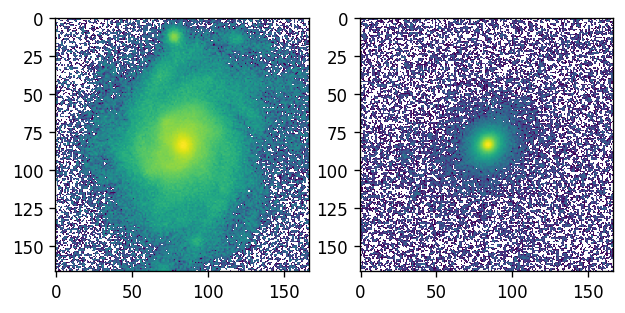

In [6]:
from astropy.io import fits
import matplotlib as mpl
import pylab as plt

plt.figure(dpi=120)
plt.subplot(1,2,1) #setting up 1st subplot

#reading in the data and plotting the first image
img_1_data = fits.getdata("./predict_images/587722984439545906-g.fits")
plt.imshow(img_1_data,norm = mpl.colors.LogNorm())

plt.subplot(1,2,2) #setting up the 2nd subplot

#reading in the data and plotting the second image
img_2_data = fits.getdata("./predict_images/587725552281976904-g.fits")
plt.imshow(img_2_data,norm = mpl.colors.LogNorm())

# Performing Predictions with Keras

Now, we will be using the models trained on SDSS simulations and real data from the paper in order to perform predictions on the two above images. 

In [7]:
from gamornet.keras_module import gamornet_predict_keras
import numpy as np

#Adding an explicit third axis to the image data (as this is needed for
#the GaMorNet function to work properly). Just to be clear the images
#were already 167*167, so we are not resizing the X,Y dimensions in any
#way
img_1_data = np.reshape(img_1_data,newshape=(167,167,1))
img_2_data = np.reshape(img_2_data,newshape=(167,167,1))
img_array = np.array([img_1_data,img_2_data])

#Performing Predictions
predictions = gamornet_predict_keras(img_array, model_load_path='SDSS_tl', input_shape='SDSS', batch_size=64)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Loading GaMorNet Model.....
Fetching SDSS TL Weigths.....
Performing Predictions.....





The `model_load_path = 'SDSS_tl'` is a special parameter value which automatically downloads and uses the final SDSS model of the paper. The `input_shape` parameter specifies the shape of the input images. Setting this to `SDSS` automatically sets the value to `(167,167,1)`

 For an explanation of each of the arguments of `gamornet_predict_keras`, please have a look at the [API Documentation](https://gamornet.readthedocs.io/en/latest/api_docs.html)

## Understanding the Predictions

In [8]:
predictions.shape

(2, 3)

As the above code-block shows, the returned predictions array is of the shape (#nimages, 3) where for each image we have one single-dimensional array with 3 elements where

* Element 0 is the probability for the image to be disk-dominated
* Element 1 is the probability for the image to be indeterminate
* Element 2 is the probability for the image to be bulge-dominated

In [9]:
#1st image predictions 
print(predictions[0])

#2nd image predictions
print(predictions[1])

[9.9598134e-01 3.9425832e-03 7.6107593e-05]
[5.2933254e-05 6.2009869e-03 9.9374604e-01]


As can be seen from the above arrays, GaMorNet predicts with 99.6% confidence that the first image is a disk-dominated galaxy and with 99.37% confidence that the second image is a bulge-dominated galaxy. 

These are indeed correct predictions as can be verified by investigating the light profiles of the galaxies in detail. 

*Tip: The number in the name of each image file refers to their SDSS Object ID*

# Performing Predictions with TFLearn

Now, we will be using the models trained on SDSS simulations and real data from the paper in order to perform predictions on the two above images. 

In [10]:
from gamornet.tflearn_module import gamornet_predict_tflearn
import numpy as np

#Adding an explicit third axis to the image data (as this is needed for
#the GaMorNet function to work properly). Just to be clear the images
#were already 167*167, so we are not resizing the X,Y dimensions in any
#way
img_1_data = np.reshape(img_1_data,newshape=(167,167,1))
img_2_data = np.reshape(img_2_data,newshape=(167,167,1))
img_array = np.array([img_1_data,img_2_data])

#Performing Predictions
predictions = gamornet_predict_tflearn(img_array, model_load_path='SDSS_tl', input_shape='SDSS', 
                                       batch_size=64,clear_session=True)



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.







Loading GaMorNet Model.....
Fetching SDSS TL Weigths.....
INFO:tensorflow:Restoring parameters from /content/check-1546293
Performing Predictions.....


- |#                                                  | 0 Elapsed Time: 0:00:00


The `model_load_path = 'SDSS_tl'` is a special parameter value which automatically downloads and uses the final SDSS model of the paper. The `input_shape` parameter specifies the shape of the input images. Setting this to `SDSS` automatically sets the value to `(167,167,1)`. The `clear_session = True` parameter value instructs GaMorNet to clear the TensorFlow graphs created earlier. We highly recommend setting `clear_session` to `True` in notebooks while using the `tflearn_module` as otherwise it might fail. 


For an explanation of each of the arguments of `gamornet_predict_tflearn`, please have a look at the [API Documentation](https://gamornet.readthedocs.io/en/latest/api_docs.html)

## Understanding the Predictions

In [11]:
predictions.shape

(2, 3)

As the above code-block shows the returned predictions array is of the shape (#nimages, 3) where for each image we have one single-dimensional array with 3 elements where

* Element 0 is the probability for the image to be disk-dominated
* Element 1 is the probability for the image to be indeterminate
* Element 2 is the probability for the image to be bulge-dominated

In [12]:
#1st image predictions 
print(predictions[0])

#2nd image predictions
print(predictions[1])

[9.9996006e-01 3.9818508e-05 1.3665986e-07]
[1.0257601e-04 7.4935751e-03 9.9240381e-01]


As can be seen from the above arrays, GaMorNet predicts with 99.9% confidence that the first image is a disk-dominated galaxy and with 99.24% confidence that the second image is a bulge-dominated galaxy. 

These are indeed correct predictions as can be verified by investigating the light profiles of the galaxies in detail. 

*Tip: The number in the name of each image file refers to their SDSS Object ID*

# Summary & Takeaways

* `gamornet_predict_keras` and `gamornet_predict_tflearn` are the two functions that can be used to perform predictions.

* As could be seen above, the Keras and the TFLearn models gave the same class predictions, but slightly different probabilities. For understanding the differences between these two models, see the [PDR Handbook](https://gamornet.readthedocs.io/en/latest/usage_guide.html). 

* The [PDR Handbook](https://gamornet.readthedocs.io/en/latest/usage_guide.html) also contains advice on which models to use to perform predictions on different kinds of images.